In [49]:
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ochl



In [50]:
start_date = '2019-01-01'
end_date = '2019-11-20'

pro = ts.pro_api()

# Obtain  all stocks available

data = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
data = data.dropna()
data.drop(data[data.symbol.astype('int') > 604000].index, inplace = True)
data.head()

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427


In [41]:
stock_list = [i for i in data.ts_code]

# Classify industry info

data.industry = data.industry.astype('category')


0         银行
1       全国地产
2       生物制药
3       环境保护
4       区域地产
5       酒店餐饮
6       运输设备
7        综合类
8       建筑工程
9       区域地产
10        玻璃
11      全国地产
12      家用电器
13      文教休闲
15      其他商业
16       元器件
17      IT设备
18      其他建材
19      汽车服务
20      其他商业
21      火力发电
22      医药商业
23      区域地产
24      汽车配件
25      全国地产
26       元器件
27       综合类
28      环境保护
29      全国地产
30      火力发电
        ... 
3643    专用机械
3644      服饰
3645    建筑工程
3646    专用机械
3647    化学制药
3648    机械基件
3649    仓储物流
3650    化工原料
3651    其他建材
3652    其他商业
3653    医疗保健
3654    化工原料
3655       铝
3656    建筑工程
3657    染料涂料
3658    汽车配件
3659    日用化工
3660    机械基件
3661     半导体
3662    医疗保健
3663    电气设备
3664     元器件
3665    软件服务
3666      塑料
3667    家居用品
3668     小金属
3669    家用电器
3670    汽车配件
3671     中成药
3672     出版业
Name: industry, Length: 3671, dtype: category
Categories (110, object): [IT设备, 专用机械, 中成药, 乳制品, ..., 陶瓷, 食品, 饲料, 黄金]

In [74]:
df = ts.pro_bar(ts_code='000635.SZ', adj='qfq', start_date='20180801', end_date='20181011')

In [79]:
df[:10]

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000635.SZ,20181011,12.30,12.83,12.18,12.37,12.85,-0.48,-3.7354,97961.89,121770.899
1,000635.SZ,20181010,12.43,13.15,12.16,12.85,12.02,0.83,6.9052,130348.53,164190.944
2,000635.SZ,20181009,11.90,12.13,11.80,12.02,11.96,0.06,0.5017,38363.00,45953.428
3,000635.SZ,20181008,11.76,12.10,11.66,11.96,11.93,0.03,0.2515,47921.32,57120.451
4,000635.SZ,20180928,11.70,11.98,11.69,11.93,11.69,0.24,2.0530,39567.19,46991.806
5,000635.SZ,20180927,11.65,11.85,11.64,11.69,11.73,-0.04,-0.3410,25572.44,29967.093
6,000635.SZ,20180926,11.64,11.78,11.63,11.73,11.67,0.06,0.5141,27430.20,32083.255
7,000635.SZ,20180925,11.65,11.75,11.55,11.67,11.78,-0.11,-0.9338,20648.00,24102.059
8,000635.SZ,20180921,11.70,11.85,11.49,11.78,11.69,0.09,0.7699,49266.45,57501.286
9,000635.SZ,20180920,11.46,11.75,11.41,11.69,11.46,0.23,2.0070,48894.48,56760.695


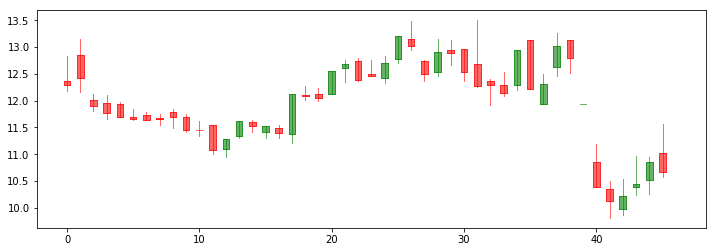

In [76]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
# ax.set_xticks(range(0, len(df['trade_date']), 10))
# ax.set_xticklabels(df['trade_date'][::10])


candlestick2_ochl(ax, df['open'], df['close'], df['high'], df['low'],
                     width=0.5, colorup='r', colordown='green',
                     alpha=0.6)
img_name = "ss"
plt.savefig(img_name + ".png")
plt.show()


In [72]:
def generate_img(data, img_name):
    
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    candlestick2_ochl(ax, df['open'], df['close'], df['high'], df['low'],
                         width=0.5, colorup='r', colordown='green',
                         alpha=0.6)
    plt.savefig(img_name + ".png")